# 1. Recap

`Line charts were an appropriate choice for visualizing this dataset because the rows had a natural ordering to it. Each row reflected information about an event that occurred after the previous row`. Changing the order of the rows would make the line chart inaccurate. The lines from one marker to the next helped emphasize the logical connection between the data points.

**In this mission, we'll be working with a dataset that has no particular order**

# 2. Introduction to the data

To investigate the potential bias that movie reviews site have, [FiveThirtyEight](https://fivethirtyeight.com/) compiled data for 147 films from 2015 that have substantive reviews from both critics and consumers. Every time Hollywood releases a movie, critics from [Metacritic](https://www.metacritic.com/), [Fandango](https://www.fandango.com/), [Rotten Tomatoes](https://www.rottentomatoes.com/), and [IMDB](https://www.imdb.com/) review and rate the film. They also ask the users in their respective communities to review and rate the film. Then, they calculate the average rating from both critics and users and display them on their site. Here are screenshots from each site:

FiveThirtyEight compiled this dataset to investigate if there was any bias to Fandango's ratings. In addition to aggregating ratings for films, Fandango is unique in that it also sells movie tickets, and so it has a direct commercial interest in showing higher ratings. After discovering that a few films that weren't good were still rated highly on Fandango, the team investigated and published an [article about bias in movie ratings](https://fivethirtyeight.com/features/fandango-movies-ratings/).

We'll be working with the fandango_scores.csv file, which can be downloaded from the [FiveThirtEight Github repo]. Here are the columns we'll be working with in this mission:

* FILM - film name
* RT_user_norm - average user rating from Rotten Tomatoes, normalized to a 1 to 5 point scale
* Metacritic_user_nom - average user rating from Metacritic, normalized to a 1 to 5 point scale
* IMDB_norm - average user rating from IMDB, normalized to a 1 to 5 point scale
* Fandango_Ratingvalue - average user rating from Fandango, normalized to a 1 to 5 point scale
* Fandango_Stars - the rating displayed on the Fandango website (rounded to nearest star, 1 to 5 point scale)

## TODO:
* Read fandango_scores.csv into a Dataframe named reviews.
* Select the following columns and assign the resulting Dataframe to norm_reviews:
  * FILM
  * RT_user_norm
  * Metacritic_user_nom (note the misspelling of norm)
  * IMDB_norm
  * Fandango_Ratingvalue
  * Fandango_Stars
* Display the first row in norm_reviews

In [1]:
import pandas as pd

reviews=pd.read_csv('fandango_scores.csv')

In [2]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [3]:
norm_reviews=reviews[['FILM','RT_user_norm','Metacritic_user_nom','IMDB_norm','Fandango_Ratingvalue','Fandango_Stars']]

In [4]:
norm_reviews.iloc[0]

FILM                    Avengers: Age of Ultron (2015)
RT_user_norm                                       4.3
Metacritic_user_nom                               3.55
IMDB_norm                                          3.9
Fandango_Ratingvalue                               4.5
Fandango_Stars                                       5
Name: 0, dtype: object

# 3. Bar Plot

These sites use different scales for ratings. Some use a 5 star scale while others use a 100 point scale. In addition, Metacritic and Rotten Tomatoes aggregate scores from both users and film critics, while IMDB and Fandango aggregate only from their users. We'll focus on just the average scores from users, because not all of the sites have scores from critics.

`The RT_user_norm, Metacritic_user_nom, IMDB_norm, and Fandango_Ratingvalue columns contain the average user rating for each movie, normalized to a 0 to 5 point scale. This allows us to compare how the users on each site rated a movie`. While using averages isn't perfect because films with a few reviews can skew the average rating, FiveThirtyEight only selected movies with a non-trivial number of ratings to ensure films with only a handful of reviews aren't included.

In [5]:
from IPython.display import Image
Image(url='https://s3.amazonaws.com/dq-content/vertical_bar_plot.png')

# 4. Creating Bars

To create a useful bar plot, however, we need to specify the positions of the bars, the widths of the bars, and the positions of the axis labels. Here's a diagram that shows the various values we need to specify:

In [6]:
from IPython.display import Image
Image(url='https://s3.amazonaws.com/dq-content/matplotlib_barplot_positioning.png')

* We can generate a vertical bar plot using either `pyplot.bar()` or `Axes.bar()`. We'll use Axes.bar() so we can extensively customize the bar plot more easily. We can use `pyplot.subplots() to first generate a single subplot and return both the Figure and Axes object`. This is a shortcut from the technique we used in the previous mission:

`fig, ax = plt.subplots()`

## TODO:
* Create a single subplot and assign the returned Figure object to fig and the returned Axes object to ax.
* Generate a bar plot with:
  * left set to bar_positions
  * height set to bar_heights
  * width set to 0.5
* Use plt.show() to display the bar plot.

<BarContainer object of 5 artists>

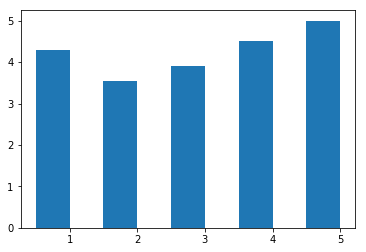

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import arange
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

fig,ax=plt.subplots()
bar_heights = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75
ax.bar(bar_positions,bar_heights,0.5)

# 5. Aligning Axis Ticks And Labels

* We only need tick labels on the x-axis where the bars are positioned. We can use `Axes.set_xticks()` to change the positions of the ticks to [1, 2, 3, 4, 5]:
* we can use `Axes.set_xticklabels()` to specify the tick labels

## TODO:
* Create a single subplot and assign the returned Figure object to fig and the returned Axes object to ax.
* Generate a bar plot with:
  * left set to bar_positions
  * height set to bar_heights
  * width set to 0.5
* Set the x-axis tick positions to tick_positions.
* Set the x-axis tick labels to num_cols and rotate by 90 degrees.
* Set the x-axis label to "Rating Source".
* Set the y-axis label to "Average Rating".
* Set the plot title to "Average User Rating For Avengers: Age of Ultron (2015)".
* Use plt.show() to display the bar plot.

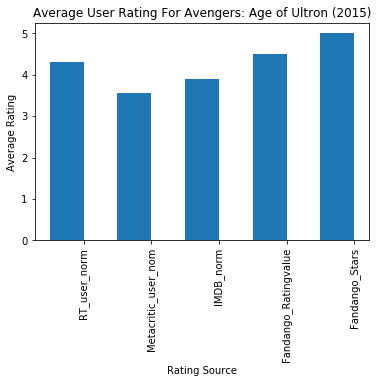

In [8]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_heights = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)\

fig,ax=plt.subplots()
ax.bar(bar_positions,bar_heights,0.5)

ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols,rotation=90)

ax.set_xlabel('Rating Source')
ax.set_ylabel('Average Rating')
ax.set_title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

# 6. Horizontal Bar Plot

* We can create a horizontal bar plot in matplotlib in a similar fashion. Instead of using Axes.bar(), we use `Axes.barh()`. 

## TODO:
* Create a single subplot and assign the returned Figure object to fig and the returned Axes object to ax.
* Generate a bar plot with:
  * bottom set to bar_positions
  * width set to bar_widths
  * height set to 0.5
* Set the y-axis tick positions to tick_positions.
* Set the y-axis tick labels to num_cols.
* Set the y-axis label to "Rating Source".
* Set the x-axis label to "Average Rating".
* Set the plot title to "Average User Rating For Avengers: Age of Ultron (2015)".
* Use plt.show() to display the bar plot.

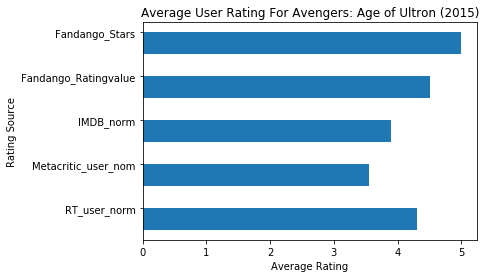

In [9]:
bar_widths = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)

fig,ax=plt.subplots()
ax.barh(bar_positions,bar_widths,0.5)

ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)

ax.set_ylabel('Rating Source')
ax.set_xlabel('Average Rating')
ax.set_title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

# 7. Scatter plot

In the previous mission, `the line charts we generated always connected points from left to right`. This helped us show the trend, up or down, between each point as we scanned visually from left to right. Instead, we can avoid using lines to connect markers and just use the underlying markers. **A plot containing just the markers is known as a scatter plot**.

To generate a scatter plot, we use `Axes.scatter()`. The scatter() method has 2 required parameters, x and y, which matches the parameters of the plot() method. `The values for these parameters need to be iterable objects` of matching lengths (lists, NumPy arrays, or pandas series).

## TODO:
* Create a single subplot and assign the returned Figure object to fig and the returned Axes object to ax.
* Generate a scatter plot with the Fandango_Ratingvalue column on the x-axis and the RT_user_norm column on the y-axis.
* Set the x-axis label to "Fandango" and the y-axis label to "Rotten Tomatoes".
* Use plt.show() to display the resulting plot.

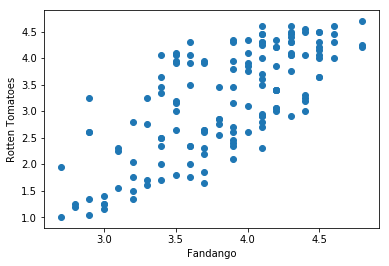

In [10]:
fig,ax=plt.subplots()
ax.scatter(norm_reviews['Fandango_Ratingvalue'],norm_reviews['RT_user_norm'])

ax.set_xlabel('Fandango')
ax.set_ylabel('Rotten Tomatoes')
plt.show()

**A scatter plot helps us determine if 2 columns are weakly or strongly correlated. While calculating the correlation coefficient will give us a precise number, a scatter plot helps us find outliers, gain a more intuitive sense of how spread out the data is, and compare more easily.**

# 8. Switching axes

The scatter plot suggests that there's a weak, positive correlation between the user ratings on Fandango and the user ratings on Rotten Tomatoes. **`The correlation is weak because for many x values, there are multiple corresponding y values`**. The correlation is **`positive because, in general, as x increases, y also increases`**.

When using scatter plots to understand how 2 variables are correlated, it's usually not important which one is on the x-axis and which one is on the y-axis. This is because the relationship is still captured either way, even if the plots look a little different. `If you want to instead understand how an independent variable affects a dependent variables, you want to put the independent one on the x-axis and the dependent one on the y-axis. Doing so helps emphasize the potential cause and effect relation.`

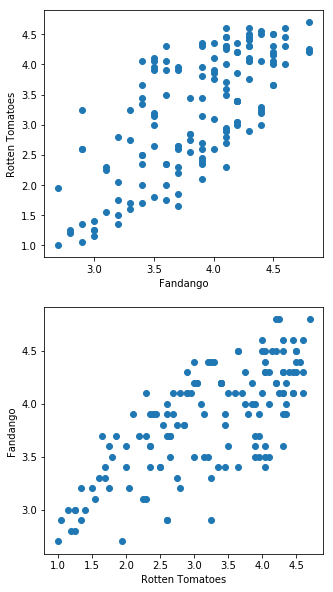

In [11]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

reviews = pd.read_csv('fandango_scores.csv')
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
norm_reviews = reviews[cols]

ax1.scatter(norm_reviews['Fandango_Ratingvalue'],norm_reviews['RT_user_norm'])
ax2.scatter(norm_reviews['RT_user_norm'],norm_reviews['Fandango_Ratingvalue'])

ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax2.set_xlabel('Rotten Tomatoes')
ax2.set_ylabel('Fandango')
plt.show()

# 9. Benchmarking correlation

The second scatter plot is a mirror reflection of the first scatter plot. The nature of the correlation is still reflected, however, which is the important thing

## TODO
Let's now generate scatter plots to see how Fandango ratings correlate with all 3 of the other review sites.

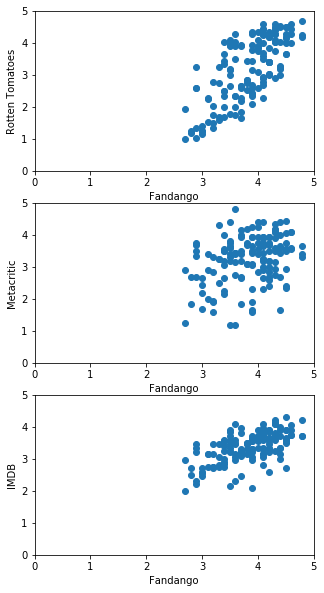

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)
ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)

ax2.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['Metacritic_user_nom'])
ax2.set_xlabel('Fandango')
ax2.set_ylabel('Metacritic')
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)

ax3.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['IMDB_norm'])
ax3.set_xlabel('Fandango')
ax3.set_ylabel('IMDB')
ax3.set_xlim(0, 5)
ax3.set_ylim(0, 5)

plt.show()

### Observation:
From the scatter plots, we can conclude that user ratings from Metacritic and Rotten Tomatoes span a larger range of values than those from IMDB or Fandango. User ratings from Metacritic and Rotten Tomatoes range from 1 to 5. User ratings from Fandango range approximately from 2.5 to 5 while those from IMDB range approximately from 2 to 4.5.